In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('invoices.csv', index_col = 'InvoiceNum', parse_dates = True)

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.drop(['OpenAmt'], axis = 1)
df.fillna(0)
df.head()

,InvoiceDate,VendorID,OrigAmt,Type
InvoiceNum,,,,
5033507,2010-12-03,Vendor P,36745.16,INV
5044437,2011-09-02,Vendor P,21167.22,INV
6055351,2017-12-29,Vendor P,15189.71,INV
6055352,2017-12-29,Vendor P,11195.12,INV
6070137,2018-12-28,Vendor P,6329.12,INV


In [4]:
#My Questions:
#1. Of the four, which vendor gets the most of the business? Who gets the least?
#2. Are the general distributions of payments from vendors similar or different? Which vendors have larger variances in payment?
#3. Are certain vendors gaining business over time, and are others losing more business?
#4. Do certain sections of the year have more of an impact on the invoices? If so, can one anticipate how much each quarter
#   might cost per vendor?

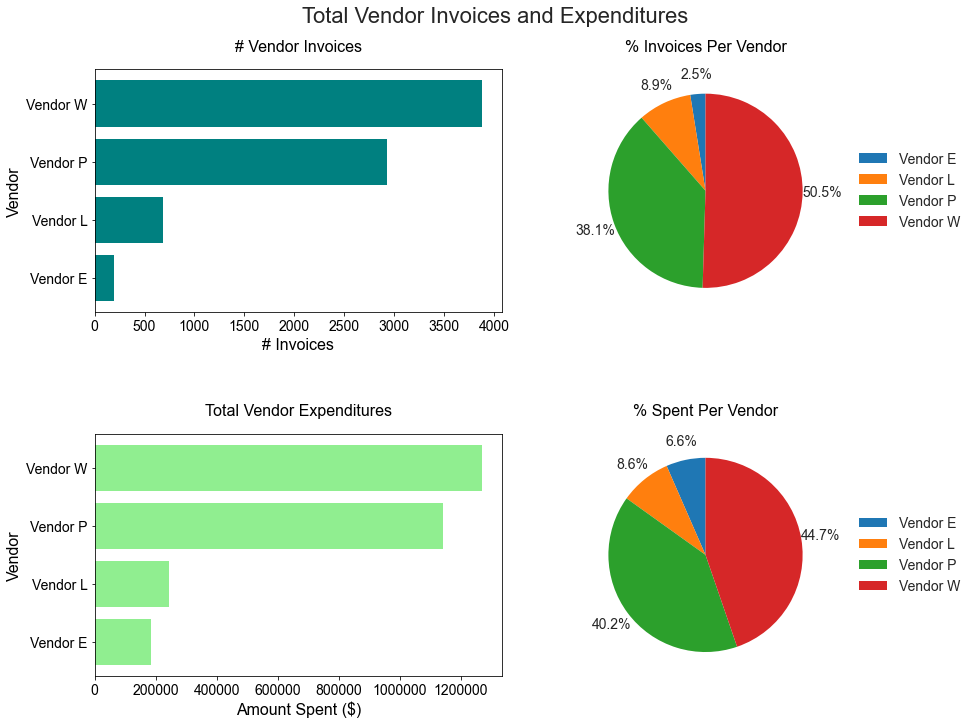

In [5]:
%matplotlib inline
#1
vendorCounts = df.groupby('VendorID').count()
vendorSums = df.groupby('VendorID').sum()
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))
plt.style.use('seaborn')
fig.tight_layout()
fig.suptitle('Total Vendor Invoices and Expenditures', fontsize = 22, y = 1.075)
plt.subplots_adjust(wspace = 0, hspace = .5)
ax[0, 0].barh(vendorCounts.index, vendorCounts['OrigAmt'], color = 'teal')
ax[0, 0].set_title('# Vendor Invoices', fontsize = 16, y = 1.05)
ax[0, 0].set_xlabel('# Invoices', fontsize = 16)
ax[0, 0].set_ylabel('Vendor', fontsize = 16);
ax[0, 0].tick_params(labelsize = 14)
ax[0, 1].pie(x = vendorCounts['OrigAmt'], startangle = 90, pctdistance = 1.2, autopct='%1.1f%%', textprops = {'fontsize': 14})
ax[0, 1].set_title('% Invoices Per Vendor', fontsize = 16, y = 1.05)
ax[0, 1].legend(labels = vendorCounts.index, loc = "right", fontsize = 14, bbox_to_anchor = (1.6, 0.5))
ax[1, 0].barh(vendorSums.index, vendorSums['OrigAmt'], color = 'lightgreen')
ax[1, 0].set_title('Total Vendor Expenditures', fontsize = 16, y = 1.05)
ax[1, 0].set_xlabel('Amount Spent ($)', fontsize = 16)
ax[1, 0].set_ylabel('Vendor', fontsize = 16);
ax[1, 0].tick_params(labelsize = 14)
ax[1, 0].ticklabel_format(axis = 'x', style = 'plain')
ax[1, 1].pie(x = vendorSums['OrigAmt'], startangle = 90, pctdistance = 1.2, autopct='%1.1f%%', textprops = {'fontsize': 14})
ax[1, 1].set_title('% Spent Per Vendor', fontsize = 16, y = 1.05)
ax[1, 1].legend(labels = vendorSums.index, loc = "right", fontsize = 14, bbox_to_anchor = (1.6, 0.5));
#Vendor W and Vendor P are by far the largest in numbers of invoices. While Vendor L and Vendor E are smaller,
#looking at the distributions of payments may be helpful to see who truly gets the most business.
#The more invoices exist, the more money is spent on the individual vendor. However, more money is spent on Vendor E and
#Vendor P than their relative # of invoices.

In [6]:
def vendorPay(vendor):
    thisVendor = df[df["VendorID"] == vendor]
    thisVendor = thisVendor['OrigAmt']
    return thisVendor

In [7]:
df.groupby('VendorID').count()
#Use Sturges' Rule to determine histogram bin counts
#Bypassing Sturges' Rule for Vendor P due to significant outliers

,InvoiceDate,OrigAmt,Type
VendorID,,,
Vendor E,194,194,194
Vendor L,686,686,686
Vendor P,2929,2929,2929
Vendor W,3882,3882,3882


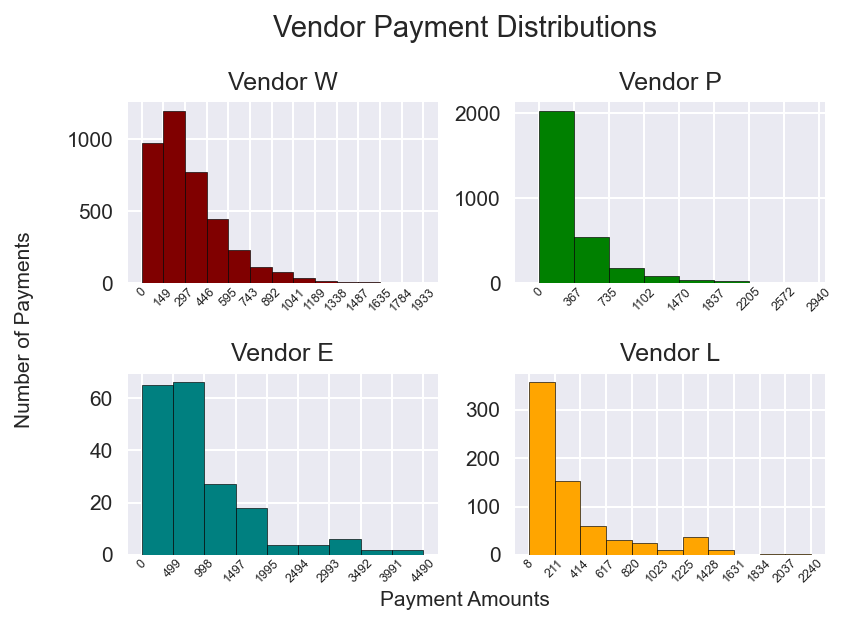

In [8]:
%matplotlib inline
#2
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_dpi(150)
plt.subplots_adjust(wspace = .25, hspace = .5)
w = vendorPay("Vendor W")
e = vendorPay("Vendor E")
p = vendorPay("Vendor P")
l = vendorPay("Vendor L")
fig.suptitle('Vendor Payment Distributions', fontsize = 14, y = 1.025)
fig.text(0.5, 0.04, 'Payment Amounts', ha = 'center')
fig.text(0, 0.5, 'Number of Payments', va = 'center', rotation = 'vertical')
#axis 1
counts, bins, patches = ax[0, 0].hist(w, bins = 13, facecolor = 'maroon', edgecolor = 'black')
ax[0, 0].set_title('Vendor W')
ax[0, 0].set_xticks(bins)
ax[0, 0].tick_params(axis = 'x', labelsize = 6, pad = 1.15, labelrotation = 45)
#axis 2
counts, bins, patches = ax[1, 0].hist(e, bins = 9, facecolor = 'teal', edgecolor = 'black')
ax[1, 0].set_title('Vendor E')
ax[1, 0].set_xticks(bins)
ax[1, 0].tick_params(axis = 'x', labelsize = 6, pad = 1.15, labelrotation = 45)
#axis 3
counts, bins, patches = ax[0, 1].hist(p, bins = 100, facecolor = 'green', edgecolor = 'black')
ax[0, 1].set_title('Vendor P')
ax[0, 1].set_xticks(bins)
ax[0, 1].tick_params(axis = 'x', labelsize = 6, pad = 1.15, labelrotation = 45)
ax[0, 1].set_xlim(xmin = -250, xmax = 3000)
#axis 4
counts, bins, patches = ax[1, 1].hist(l, bins = 11, facecolor = 'orange', edgecolor = 'black')
ax[1, 1].set_title('Vendor L')
ax[1, 1].set_xticks(bins)
ax[1, 1].tick_params(axis = 'x', labelsize = 6, pad = 1.15, labelrotation = 45);

#All four of the histograms are right-skewed, which makes sense given that the lower bound for invoices are $0.
#This means that the mode is left of the average and median for each vendor.
#Vendor E has the longest tail and is considerably more expensive than the rest of the vendors on average.

In [9]:
vendors = [w, p, l, e]
vendorstrings  = ['W', 'P', 'L', 'E']
i = 0
for v in vendors:
    print(f"Vendor {vendorstrings[i]} Standard Devation: ${round(np.std(v), 2)}.")
    i += 1
#Vendor P has the largest deviation from the norm in invoice payments, with Vendor E not close behind.
#Vendor W is the most consistent in pricing and is also the most used.
#Vendor E may also have a higher standard deviation due to the low comparative sample size.

Vendor W Standard Devation: $243.41.
Vendor P Standard Devation: $948.2.
Vendor L Standard Devation: $379.72.
Vendor E Standard Devation: $829.49.


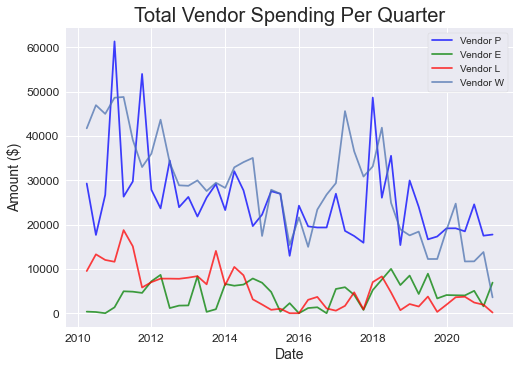

In [10]:
%matplotlib inline
#3
df.index = df['InvoiceDate']
pprice = df[df['VendorID'] == 'Vendor P'].resample('Q').sum()
eprice = df[df['VendorID'] == 'Vendor E'].resample('Q').sum()
lprice = df[df['VendorID'] == 'Vendor L'].resample('Q').sum()
wprice = df[df['VendorID'] == 'Vendor W'].resample('Q').sum()
plt.style.use('seaborn')
plt.title('Total Vendor Spending Per Quarter', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount ($)', fontsize = 14)
plt.plot(pprice, '-b', label = 'Vendor P', alpha = 0.75)
plt.plot(eprice, '-g', label = 'Vendor E', alpha = 0.75)
plt.plot(lprice, '-r', label = 'Vendor L', alpha = 0.75)
plt.plot(wprice, '-', label = 'Vendor W', alpha = 0.75)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fancybox = True, frameon = True, framealpha = 1);
#W started as the largest customer at the beginning of the decade, but has declined since.
#In the last quarter of 2020, all vendors had costs below $20,000 per quarter.

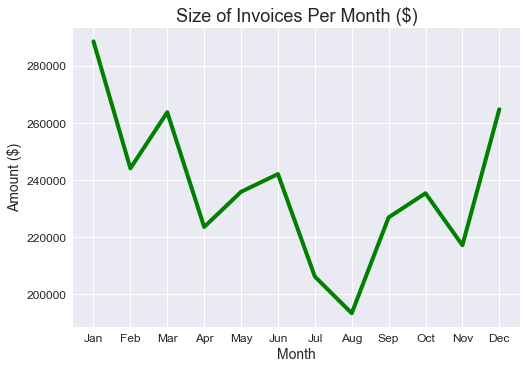

In [11]:
%matplotlib inline
#4
df_monthly = df
df_monthly.index = df_monthly['InvoiceDate']
by_month = df_monthly.groupby(df_monthly.index.month).sum()
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.style.use('seaborn')
plt.plot(by_month.index, by_month['OrigAmt'], linewidth = 4, color = 'green')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Amount ($)', fontsize = 14, rotation = 'vertical')
plt.title('Size of Invoices Per Month ($)', fontsize = 18)
plt.tick_params(labelsize = 12);
#Expect to spend the most during the months of January and December. 
#Expect to spend the least during the summer and early fall.

In [12]:
by_month['%Total'] = round(((by_month['OrigAmt'] / by_month['OrigAmt'].sum()) * 100), 2)
i = 0
z = 1
while i < 12:
    amt = round(by_month.iloc[i:i+2]['OrigAmt'].sum(),2)
    perc = round(by_month.iloc[i:i+2]['%Total'].sum(), 2)
    print("Quarter {} Total: ${:,.2f}, {}% of the grand total.".format(z, amt, perc))
    i += 3
    z += 1
#On average, invoices are highest in Quarter 1.

Quarter 1 Total: $532,798.80, 18.74% of the grand total.
Quarter 2 Total: $459,560.34, 16.17% of the grand total.
Quarter 3 Total: $399,658.05, 14.06% of the grand total.
Quarter 4 Total: $452,672.19, 15.92% of the grand total.
